In [ ]:
'''Big Mart will try to understand the properties of products and outlets which play a key role in increasing sales.'''

'Big Mart will try to understand the properties of products and outlets which play a key role in increasing sales.'

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akashdeepkuila/big-mart-sales")

print("Path to dataset files:", path)

100%|██████████| 307k/307k [00:00<00:00, 71.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akashdeepkuila/big-mart-sales/versions/1


# Task
Load the `Train-Set.csv` and `Test-Set.csv` datasets from `/kaggle/input/big-mart-sales` into pandas DataFrames for analysis.

## Load Dataset

### Subtask:
Load the training and testing datasets ('Train-Set.csv' and 'Test-Set.csv') from the provided path into pandas DataFrames.


**Reasoning**:
The first instruction is to import the pandas library, which is necessary for loading data into DataFrames. Then, I will load the 'Train-Set.csv' and 'Test-Set.csv' files into `train_df` and `test_df` DataFrames using `pd.read_csv()` and display their first few rows to confirm successful loading.



In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/Train-Set.csv')
test_df = pd.read_csv('/content/Test-Set.csv')

print('Train DataFrame Head:')
print(train_df.head())
print('\nTest DataFrame Head:')
print(test_df.head())

Train DataFrame Head:
  ProductID  Weight FatContent  ProductVisibility            ProductType  \
0     FDA15    9.30    Low Fat           0.016047                  Dairy   
1     DRC01    5.92    Regular           0.019278            Soft Drinks   
2     FDN15   17.50    Low Fat           0.016760                   Meat   
3     FDX07   19.20    Regular           0.000000  Fruits and Vegetables   
4     NCD19    8.93    Low Fat           0.000000              Household   

        MRP OutletID  EstablishmentYear OutletSize LocationType  \
0  249.8092   OUT049               1999     Medium       Tier 1   
1   48.2692   OUT018               2009     Medium       Tier 3   
2  141.6180   OUT049               1999     Medium       Tier 1   
3  182.0950   OUT010               1998        NaN       Tier 3   
4   53.8614   OUT013               1987       High       Tier 3   

          OutletType  OutletSales  
0  Supermarket Type1    3735.1380  
1  Supermarket Type2     443.4228  
2  Superma

## Exploratory Data Analysis (EDA)

### Subtask:
Perform an in-depth exploratory data analysis on both the training and testing datasets. This includes checking data types, descriptive statistics, distributions of numerical and categorical features (using histograms, box plots, and count plots), identifying correlations, and visually inspecting for outliers or anomalies. This step will help us understand the data characteristics and guide the cleaning process.


**Reasoning**:
The first step of EDA is to get a concise summary of the dataframes to understand their structure, data types, and non-null values. This is achieved using the `.info()` method.



In [ ]:
print('--- Train DataFrame Info ---\n')
train_df.info()
print('\n--- Test DataFrame Info ---\n')
test_df.info()


--- Train DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

--- Test DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 

**Reasoning**:
After checking the data types and non-null values, the next step in EDA is to generate descriptive statistics for numerical columns in both `train_df` and `test_df` using the `.describe()` method to understand their central tendency, dispersion, and shape.



In [ ]:
print('--- Train DataFrame Descriptive Statistics ---\n')
print(train_df.describe())
print('\n--- Test DataFrame Descriptive Statistics ---\n')
print(test_df.describe())

--- Train DataFrame Descriptive Statistics ---

            Weight  ProductVisibility          MRP  EstablishmentYear  \
count  7060.000000        8523.000000  8523.000000        8523.000000   
mean     12.857645           0.066132   140.992782        1997.831867   
std       4.643456           0.051598    62.275067           8.371760   
min       4.555000           0.000000    31.290000        1985.000000   
25%       8.773750           0.026989    93.826500        1987.000000   
50%      12.600000           0.053931   143.012800        1999.000000   
75%      16.850000           0.094585   185.643700        2004.000000   
max      21.350000           0.328391   266.888400        2009.000000   

        OutletSales  
count   8523.000000  
mean    2181.288914  
std     1706.499616  
min       33.290000  
25%      834.247400  
50%     1794.331000  
75%     3101.296400  
max    13086.964800  

--- Test DataFrame Descriptive Statistics ---

            Weight  ProductVisibility          M

**Reasoning**:
To understand the distribution and variety of categorical data, I will identify all categorical columns in both DataFrames and then print their unique values and their respective counts.



**Reasoning**:
The previous code block failed due to an unterminated string literal. I will fix the `print` statements by properly closing the string on the same line and adding a newline character `\n` to ensure correct syntax.



In [ ]:
print('--- Train DataFrame Categorical Features Unique Values and Counts ---\n')
for col in train_df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(train_df[col].value_counts())

print('\n--- Test DataFrame Categorical Features Unique Values and Counts ---\n')
for col in test_df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(test_df[col].value_counts())

--- Train DataFrame Categorical Features Unique Values and Counts ---


Column: ProductID
ProductID
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

Column: FatContent
FatContent
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Column: ProductType
ProductType
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Column: OutletID
OutletID
OUT027    935
OUT013    9

**Reasoning**:
To visualize the distribution of numerical features and identify potential outliers, I will generate histograms and box plots for 'Weight', 'ProductVisibility', 'MRP', and 'OutletSales' in the training DataFrame. This will provide insights into the data's spread and central tendency.



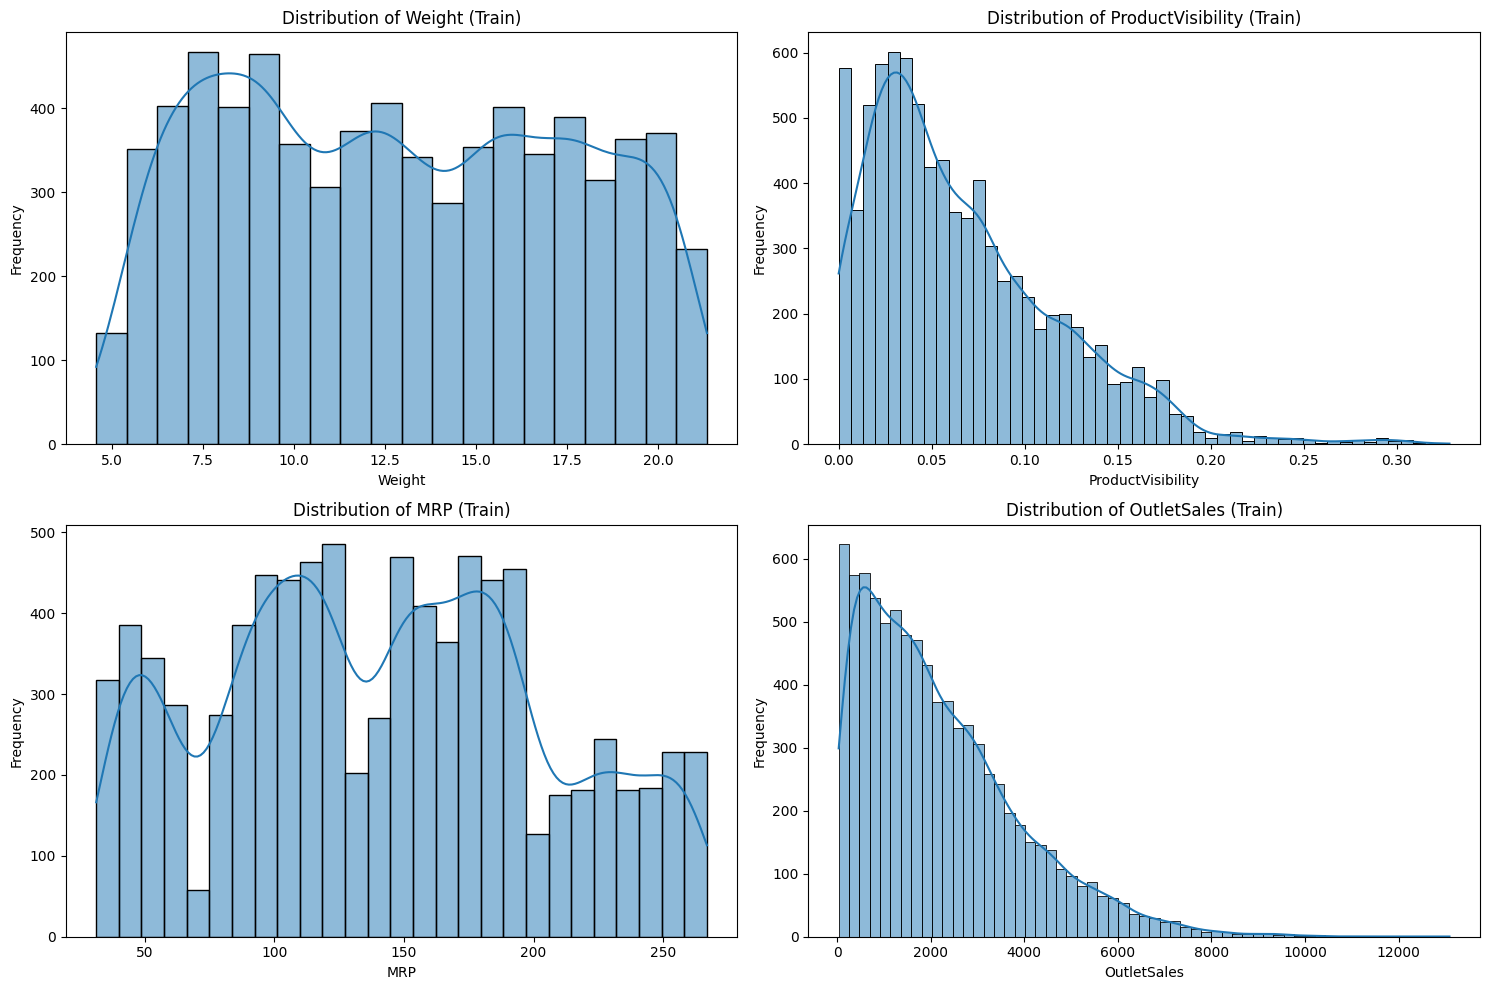

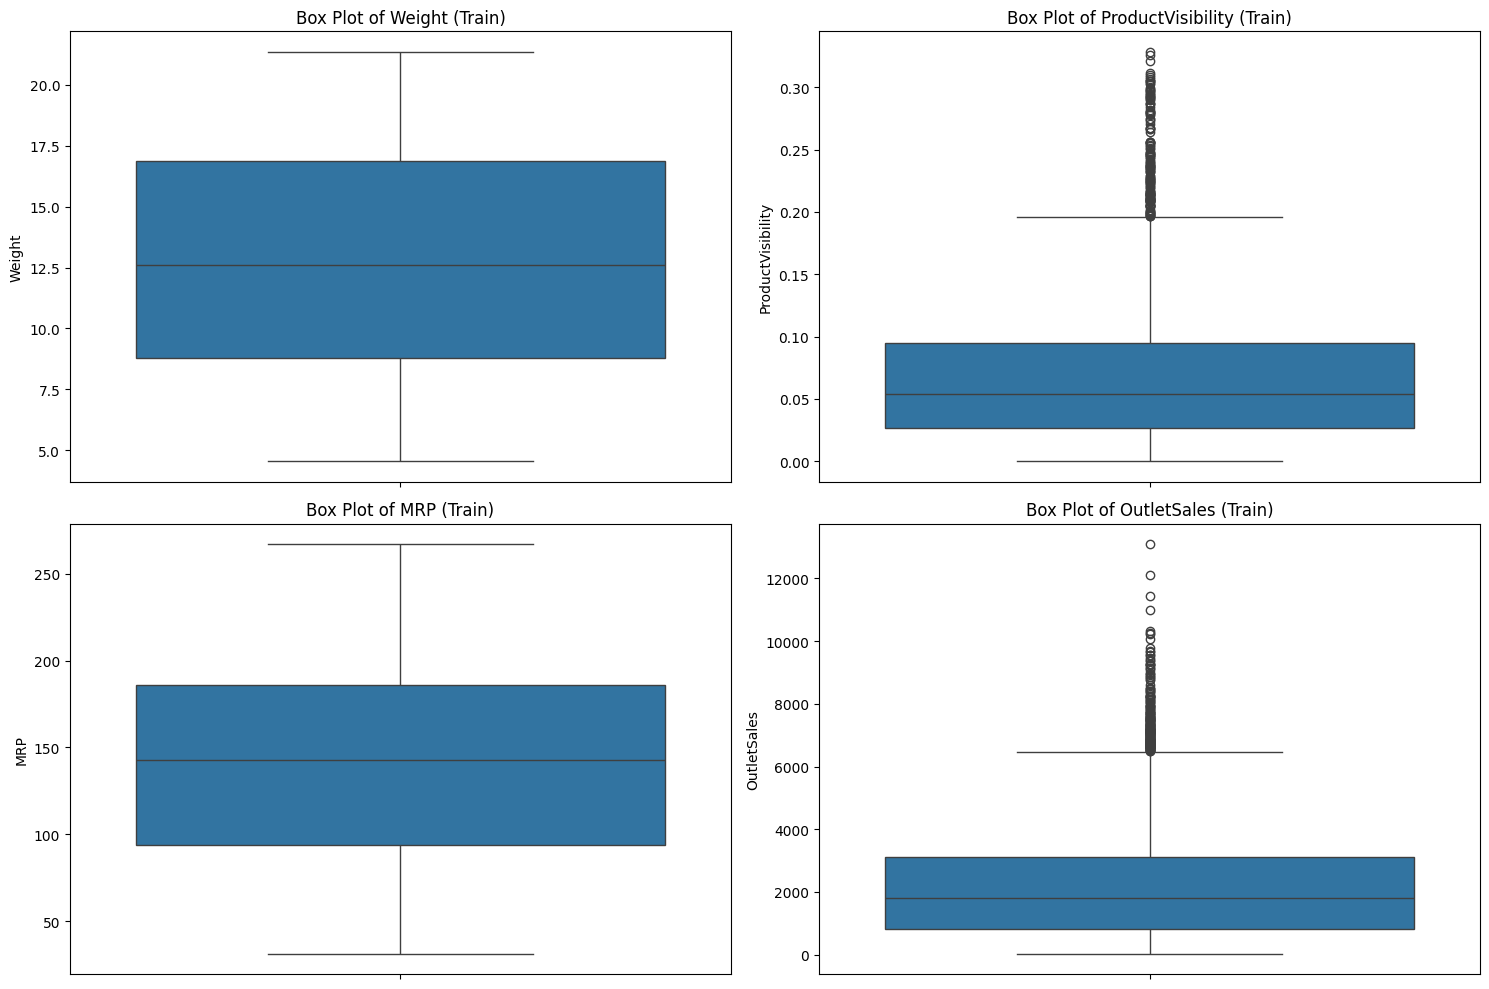

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features for visualization (Corrected column names)
numerical_cols = ['Weight', 'ProductVisibility', 'MRP', 'OutletSales']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(train_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col} (Train)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=train_df[col])
    plt.title(f'Box Plot of {col} (Train)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the distribution of categorical features in both training and testing datasets, I will generate count plots for 'FatContent', 'ProductType', 'OutletSize', 'LocationType', and 'OutletType'. This will show the frequency of each category and help in understanding their patterns.



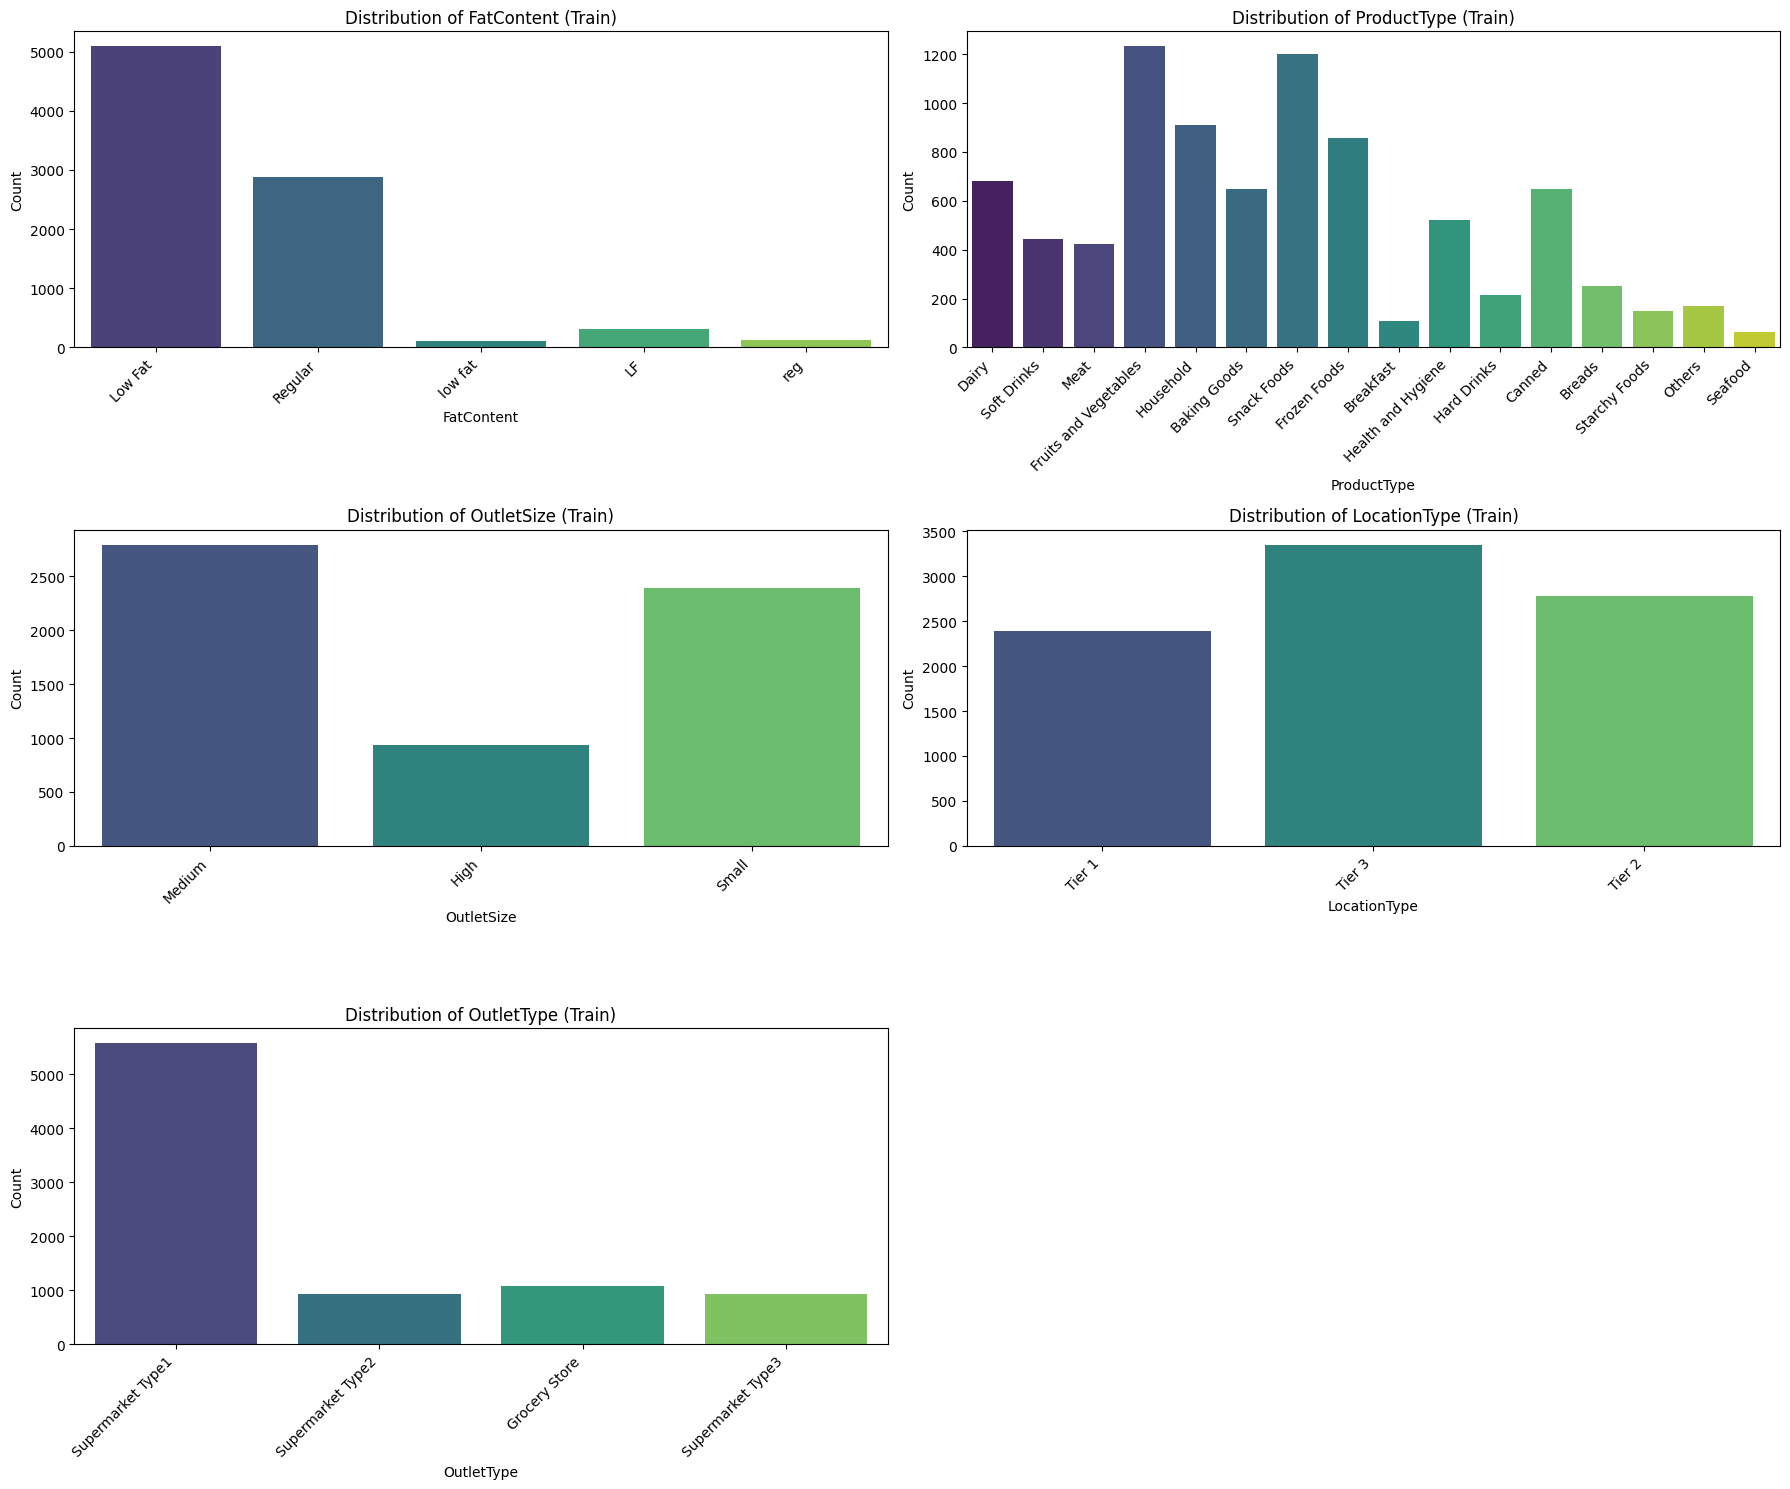

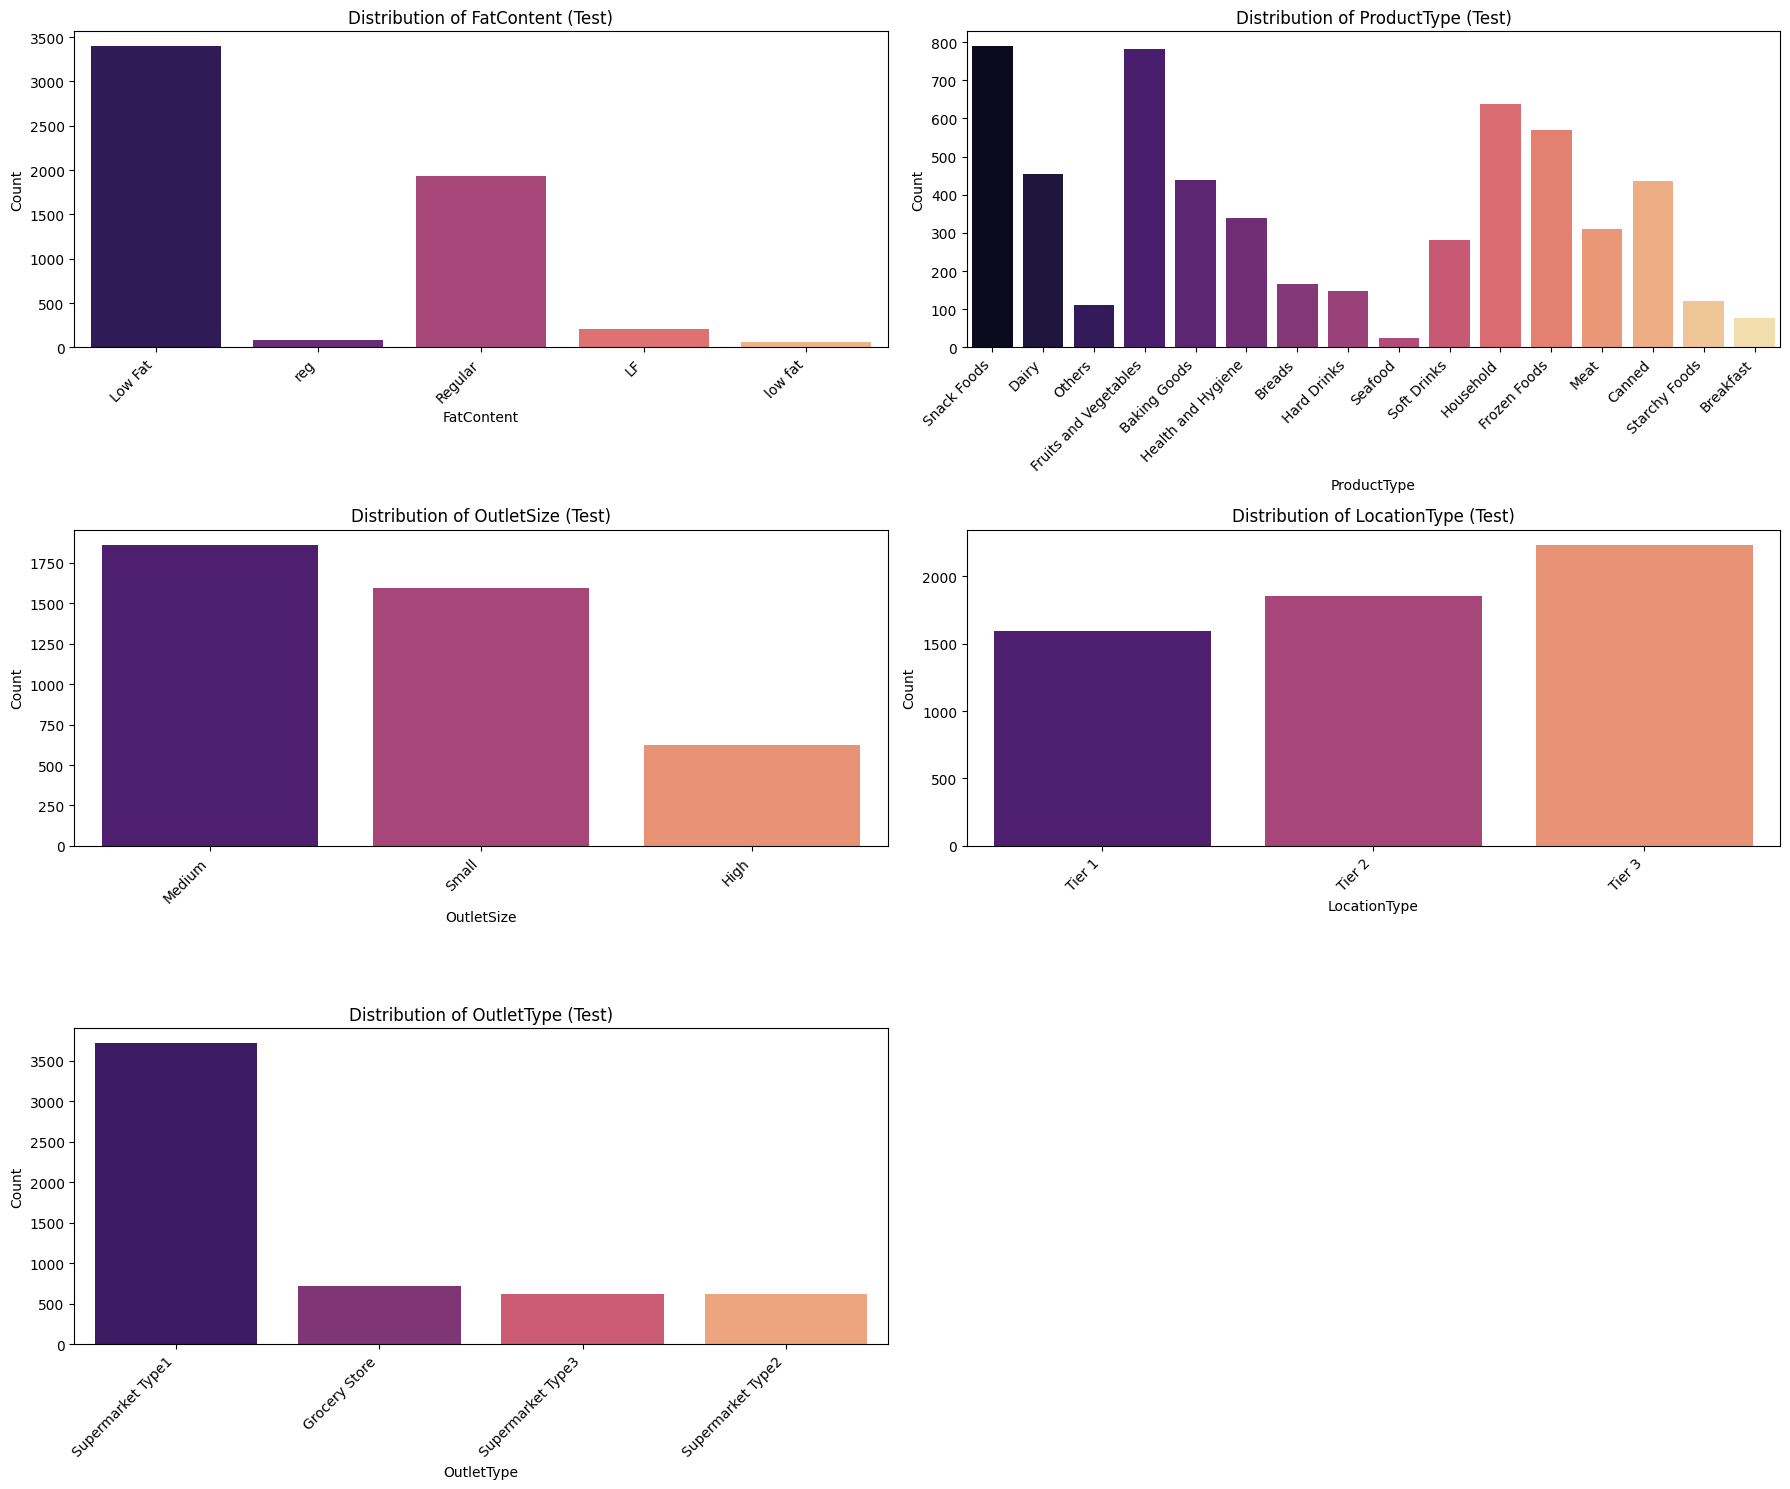

In [ ]:
categorical_cols = ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType']

# Count plots for training data
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid based on number of features
    sns.countplot(data=train_df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col} (Train)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

# Count plots for testing data
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid based on number of features
    sns.countplot(data=test_df, x=col, hue=col, palette='magma', legend=False)
    plt.title(f'Distribution of {col} (Test)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` due to `palette` being passed without `hue`. To fix this and follow the suggestion, I will assign the `x` variable to `hue` and set `legend=False` in the `sns.countplot` calls.



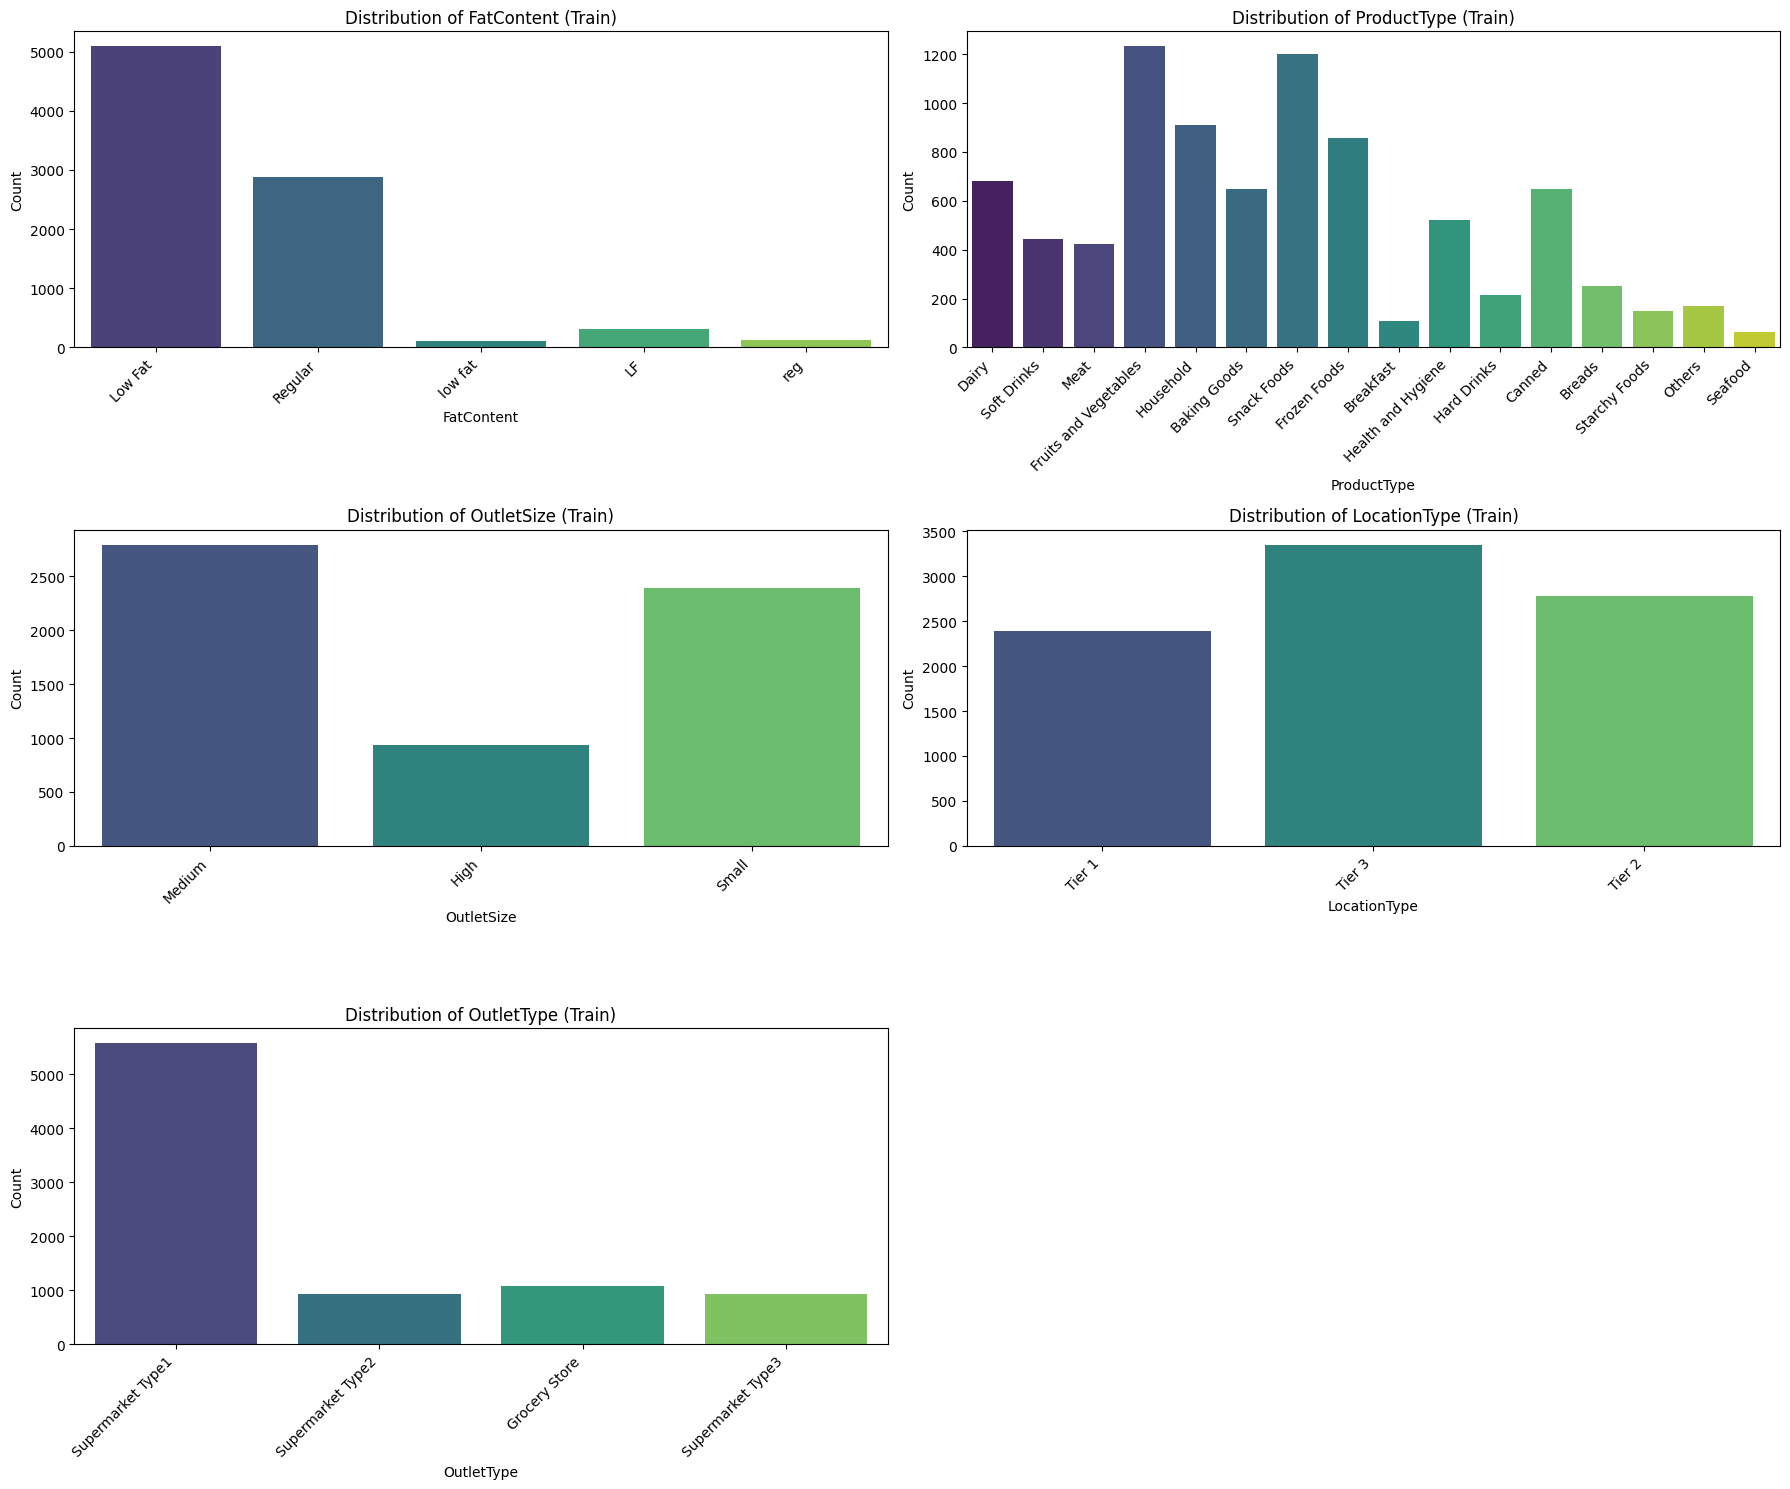

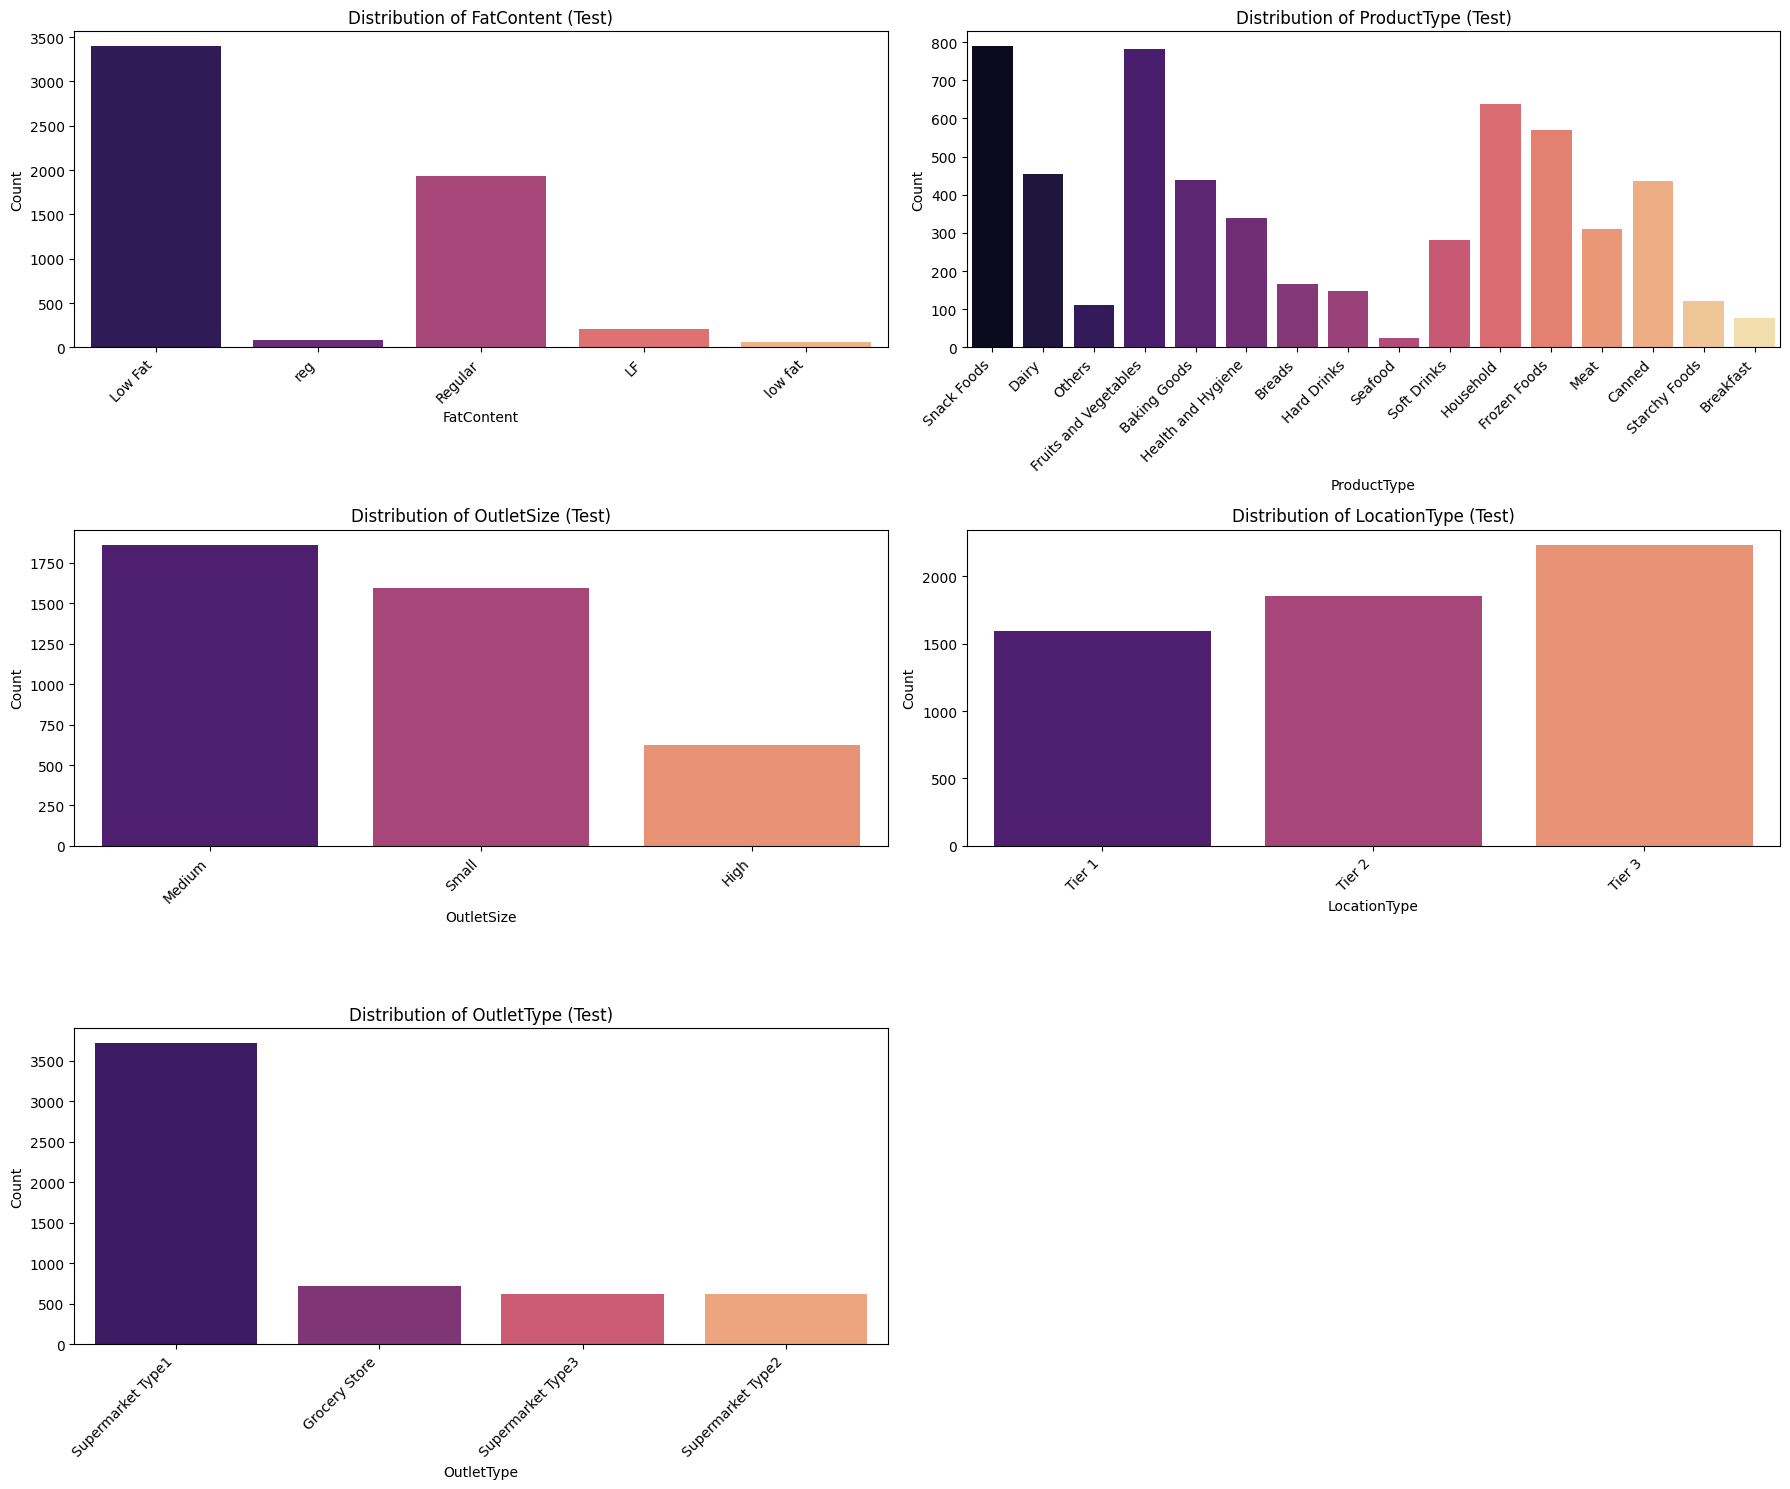

In [ ]:
categorical_cols = ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType']

# Count plots for training data
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid based on number of features
    sns.countplot(data=train_df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col} (Train)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

# Count plots for testing data
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid based on number of features
    sns.countplot(data=test_df, x=col, hue=col, palette='magma', legend=False)
    plt.title(f'Distribution of {col} (Test)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

**Reasoning**:
To identify relationships between numerical features, I will calculate the correlation matrix for the numerical columns in the `train_df` and visualize it using a heatmap.



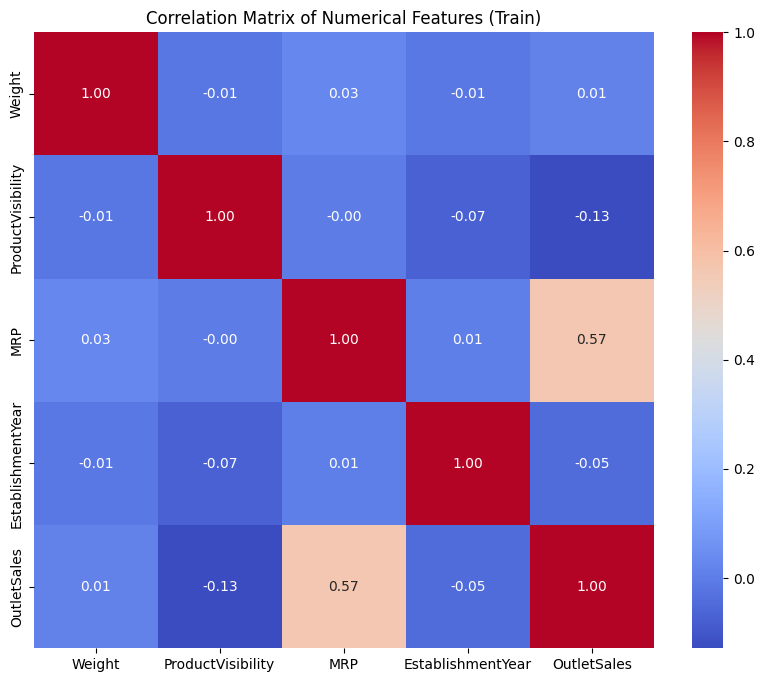

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation matrix, including 'OutletSales'
numerical_cols_train = train_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_df[numerical_cols_train].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features (Train)')
plt.show()

## Data Cleaning

### Subtask:
Clean both the training and testing datasets by handling missing values (e.g., imputation for 'Weight' and 'OutletSize'), standardizing inconsistent categorical entries (e.g., 'FatContent'), and addressing any other data quality issues identified during EDA. This step ensures the data is prepared for feature engineering and model training.


## Data Cleaning: Handling Missing Values

### Impute Missing 'Weight' Values

**Reasoning**:
The 'Weight' column has missing values in both `train_df` and `test_df`, as observed from the `.info()` output. Imputing these missing values with the median 'Weight' for each 'ProductType' is a reasonable strategy. This ensures that the imputed values are characteristic of similar products, rather than using a global median which might not be representative. The median is preferred over the mean to reduce the impact of outliers in the 'Weight' distribution, which was observed during the EDA step.

**Reasoning**:
I will impute the missing 'Weight' values in both `train_df` and `test_df` by grouping by 'ProductType' and filling `NaN` values with the median weight of that product type. This ensures that products of the same type have a consistent weight imputation.



In [ ]:
train_df['Weight'] = train_df.groupby('ProductType')['Weight'].transform(lambda x: x.fillna(x.median()))
test_df['Weight'] = test_df.groupby('ProductType')['Weight'].transform(lambda x: x.fillna(x.median()))

print("Missing 'Weight' values after imputation (Train):", train_df['Weight'].isnull().sum())
print("Missing 'Weight' values after imputation (Test):", test_df['Weight'].isnull().sum())

Missing 'Weight' values after imputation (Train): 0
Missing 'Weight' values after imputation (Test): 0


### Impute Missing 'OutletSize' Values

**Reasoning**:
The 'OutletSize' column also contains missing values, as identified during EDA. Imputing these values based on the mode 'OutletSize' for each unique combination of 'OutletType' and 'LocationType' is a suitable approach. This considers the typical size for outlets of a specific type in a particular location, making the imputation more accurate than a global mode. The mode is chosen because 'OutletSize' is a categorical variable.

### Impute Missing 'OutletSize' Values

**Reasoning**:
The 'OutletSize' column also contains missing values, as identified during EDA. Imputing these values based on the mode 'OutletSize' for each unique combination of 'OutletType' and 'LocationType' is a suitable approach. This considers the typical size for outlets of a specific type in a particular location, making the imputation more accurate than a global mode. The mode is chosen because 'OutletSize' is a categorical variable.

**Reasoning**:
I will impute the missing 'OutletSize' values in both `train_df` and `test_df` by grouping by 'OutletType' and 'LocationType' and filling `NaN` values with the mode of 'OutletSize' for each group. This ensures that the imputed values are contextually relevant.



In [ ]:
train_df['OutletSize'] = train_df.groupby(['OutletType', 'LocationType'])['OutletSize'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mode()))
test_df['OutletSize'] = test_df.groupby(['OutletType', 'LocationType'])['OutletSize'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mode()))

print("Missing 'OutletSize' values after imputation (Train):", train_df['OutletSize'].isnull().sum())
print("Missing 'OutletSize' values after imputation (Test):", test_df['OutletSize'].isnull().sum())

Missing 'OutletSize' values after imputation (Train): 555
Missing 'OutletSize' values after imputation (Test): 370


**Reasoning**:
The previous attempt to impute 'OutletSize' left some missing values, likely because certain groups had no mode or were entirely null. I will refine the imputation by first trying group-wise mode imputation and then filling any remaining missing values with the global mode of 'OutletSize'. This ensures all missing values are handled effectively.



**Reasoning**:
The `ValueError` occurred because `fillna` was called with `None` as a fill value when a group's mode was empty. I will modify the `transform` function to return the original series `x` (with NaNs) if the group's mode is empty, ensuring `fillna` is only called with a valid mode. This will allow the subsequent global mode imputation to handle any remaining missing values.



In [ ]:
for df in [train_df, test_df]:
    # Group by OutletType and LocationType and fill missing OutletSize with the mode of that group
    # If a group's mode is empty (e.g., all values are NaN), return x unchanged to be handled by global fillna
    df['OutletSize'] = df.groupby(['OutletType', 'LocationType'])['OutletSize'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
    )

    # If there are still missing values (e.g., a group had all NaNs or no mode), fill with the global mode
    global_mode = df['OutletSize'].mode()[0]
    df['OutletSize'] = df['OutletSize'].fillna(global_mode)

print("Missing 'OutletSize' values after imputation (Train):", train_df['OutletSize'].isnull().sum())
print("Missing 'OutletSize' values after imputation (Test):", test_df['OutletSize'].isnull().sum())

Missing 'OutletSize' values after imputation (Train): 0
Missing 'OutletSize' values after imputation (Test): 0


**Reasoning**:
The previous code produced a `FutureWarning` related to chained assignment with `inplace=True`. To resolve this, I will modify the `fillna` call for the global mode imputation to assign the result directly back to the column, avoiding the `inplace=True` parameter within a chained operation.



In [ ]:
for df in [train_df, test_df]:
    # Group by OutletType and LocationType and fill missing OutletSize with the mode of that group
    # If a group's mode is empty (e.g., all values are NaN), return x unchanged to be handled by global fillna
    df['OutletSize'] = df.groupby(['OutletType', 'LocationType'])['OutletSize'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
    )

    # If there are still missing values (e.g., a group had all NaNs or no mode), fill with the global mode
    global_mode = df['OutletSize'].mode()[0]
    df['OutletSize'] = df['OutletSize'].fillna(global_mode)

print("Missing 'OutletSize' values after imputation (Train):", train_df['OutletSize'].isnull().sum())
print("Missing 'OutletSize' values after imputation (Test):", test_df['OutletSize'].isnull().sum())

Missing 'OutletSize' values after imputation (Train): 0
Missing 'OutletSize' values after imputation (Test): 0


### Standardize 'FatContent' Column

**Reasoning**:
The 'FatContent' column contains inconsistent entries, such as 'LF', 'low fat', and 'reg', which represent the same categories as 'Low Fat' and 'Regular'. Standardizing these entries is crucial for accurate analysis and model training, as it ensures that all variations of the same category are treated uniformly. This step will consolidate these values into a consistent set of categories.

**Reasoning**:
I will standardize the 'FatContent' column in both `train_df` and `test_df` by replacing inconsistent entries ('LF', 'low fat', 'reg') with their standard forms ('Low Fat', 'Regular'). Then, I will display the value counts for the 'FatContent' column in both dataframes to confirm the standardization.



In [ ]:
for df in [train_df, test_df]:
    df['FatContent'] = df['FatContent'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

print("--- Train DataFrame FatContent Value Counts ---")
print(train_df['FatContent'].value_counts())
print("\n--- Test DataFrame FatContent Value Counts ---")
print(test_df['FatContent'].value_counts())

--- Train DataFrame FatContent Value Counts ---
FatContent
Low Fat    5517
Regular    3006
Name: count, dtype: int64

--- Test DataFrame FatContent Value Counts ---
FatContent
Low Fat    3668
Regular    2013
Name: count, dtype: int64


### Handle Zero 'ProductVisibility' Values

**Reasoning**:
The 'ProductVisibility' column has values that are exactly 0, which often indicates missing or incorrectly recorded data, as product visibility cannot truly be zero. To handle these, I will replace the 0 values with the median 'ProductVisibility' for each 'ProductType'. This approach ensures that the imputed visibility is characteristic of similar products, maintaining the data's integrity and representativeness while avoiding the introduction of artificial biases.

### Handle Zero 'ProductVisibility' Values

**Reasoning**:
The 'ProductVisibility' column has values that are exactly 0, which often indicates missing or incorrectly recorded data, as product visibility cannot truly be zero. To handle these, I will replace the 0 values with the median 'ProductVisibility' for each 'ProductType'. This approach ensures that the imputed visibility is characteristic of similar products, maintaining the data's integrity and representativeness while avoiding the introduction of artificial biases.

**Reasoning**:
I will replace the 0 values in the 'ProductVisibility' column with the median 'ProductVisibility' for each 'ProductType' in both `train_df` and `test_df`. After the replacement, I will verify that all 0s have been successfully handled by checking the minimum value of 'ProductVisibility' in both dataframes.



In [ ]:
for df in [train_df, test_df]:
    # Replace 0s with NaN for easier imputation
    df.loc[df['ProductVisibility'] == 0, 'ProductVisibility'] = pd.NA

    # Impute missing ProductVisibility values (originally 0) with the median ProductVisibility for each ProductType
    df['ProductVisibility'] = df.groupby('ProductType')['ProductVisibility'].transform(lambda x: x.fillna(x.median()))

print("Minimum 'ProductVisibility' after handling zeros (Train):", train_df['ProductVisibility'].min())
print("Minimum 'ProductVisibility' after handling zeros (Test):", test_df['ProductVisibility'].min())

Minimum 'ProductVisibility' after handling zeros (Train): 0.003574698
Minimum 'ProductVisibility' after handling zeros (Test): 0.003591414


## Feature Engineering and Encoding

### Subtask:
Create new features ('Outlet_Years', 'Item_Type_Combined'), transform 'ProductVisibility', and apply one-hot encoding to categorical features across both training and testing datasets.


### Feature Engineering: Creating 'Outlet_Years' and Transforming 'ProductVisibility'

**Reasoning**:
To enhance the predictive power of the model, I will create a new numerical feature, `Outlet_Years`, by calculating the age of each outlet from its `EstablishmentYear` relative to the current year (2023). This provides a more direct measure of outlet age. Additionally, to normalize its distribution and mitigate the impact of extreme values, I will apply a log transformation (`np.log1p`) to the `ProductVisibility` column. This transformation is particularly useful for right-skewed data, which `ProductVisibility` was found to be during EDA.

**Reasoning**:
Following the explained reasoning, I will now implement the creation of the 'Outlet_Years' feature by subtracting the 'EstablishmentYear' from 2023 for both dataframes, and then apply a log transformation (`np.log1p`) to the 'ProductVisibility' column in both `train_df` and `test_df`.



In [ ]:
import numpy as np

# Calculate Outlet_Years
CURRENT_YEAR = 2023
for df in [train_df, test_df]:
    df['Outlet_Years'] = CURRENT_YEAR - df['EstablishmentYear']

# Apply log transformation to ProductVisibility
for df in [train_df, test_df]:
    df['ProductVisibility'] = np.log1p(df['ProductVisibility'])

print("Train DataFrame 'Outlet_Years' head:\n", train_df['Outlet_Years'].head())
print("\nTest DataFrame 'Outlet_Years' head:\n", test_df['Outlet_Years'].head())
print("\nTrain DataFrame 'ProductVisibility' transformed head:\n", train_df['ProductVisibility'].head())
print("\nTest DataFrame 'ProductVisibility' transformed head:\n", test_df['ProductVisibility'].head())

Train DataFrame 'Outlet_Years' head:
 0    24
1    14
2    24
3    25
4    36
Name: Outlet_Years, dtype: int64

Test DataFrame 'Outlet_Years' head:
 0    24
1    16
2    25
3    16
4    38
Name: Outlet_Years, dtype: int64

Train DataFrame 'ProductVisibility' transformed head:
 0    0.015920
1    0.019095
2    0.016621
3    0.057116
4    0.047853
Name: ProductVisibility, dtype: float64

Test DataFrame 'ProductVisibility' transformed head:
 0    0.007536
1    0.037708
2    0.094924
3    0.015271
4    0.112077
Name: ProductVisibility, dtype: float64


**Reasoning**:
To further enrich the dataset, I will create a new categorical feature, 'Item_Type_Combined', by extracting the first two characters from 'ProductID' and mapping them to more descriptive categories ('Food', 'Drinks', 'Non-Consumable'). This will group products into broader types, which can be useful for analysis and modeling.



In [ ]:
for df in [train_df, test_df]:
    df['Item_Type_Combined'] = df['ProductID'].apply(lambda x: x[0:2])
    df['Item_Type_Combined'] = df['Item_Type_Combined'].map({
        'FD': 'Food',
        'DR': 'Drinks',
        'NC': 'Non-Consumable'
    })

print("Train DataFrame 'Item_Type_Combined' value counts:\n", train_df['Item_Type_Combined'].value_counts())
print("\nTest DataFrame 'Item_Type_Combined' value counts:\n", test_df['Item_Type_Combined'].value_counts())

Train DataFrame 'Item_Type_Combined' value counts:
 Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

Test DataFrame 'Item_Type_Combined' value counts:
 Item_Type_Combined
Food              4076
Non-Consumable    1087
Drinks             518
Name: count, dtype: int64


**Reasoning**:
Following the instructions, I will now store the 'OutletSales' column from `train_df` into a separate variable, as it is the target variable and is not present in `test_df`.



In [ ]:
train_labels = train_df['OutletSales']
print("Shape of train_labels:", train_labels.shape)

Shape of train_labels: (8523,)


**Reasoning**:
To ensure consistent processing of features, I will concatenate `train_df` and `test_df` into a single DataFrame, `all_data`, after dropping the 'OutletSales' column from `train_df` since it is the target variable and not present in `test_df`.



In [ ]:
train_df_processed = train_df.drop('OutletSales', axis=1)
all_data = pd.concat([train_df_processed, test_df], ignore_index=True)

print("Shape of all_data:", all_data.shape)
print("Head of all_data:\n", all_data.head())

Shape of all_data: (14204, 13)
Head of all_data:
   ProductID  Weight FatContent  ProductVisibility            ProductType  \
0     FDA15    9.30    Low Fat           0.015920                  Dairy   
1     DRC01    5.92    Regular           0.019095            Soft Drinks   
2     FDN15   17.50    Low Fat           0.016621                   Meat   
3     FDX07   19.20    Regular           0.057116  Fruits and Vegetables   
4     NCD19    8.93    Low Fat           0.047853              Household   

        MRP OutletID  EstablishmentYear OutletSize LocationType  \
0  249.8092   OUT049               1999     Medium       Tier 1   
1   48.2692   OUT018               2009     Medium       Tier 3   
2  141.6180   OUT049               1999     Medium       Tier 1   
3  182.0950   OUT010               1998      Small       Tier 3   
4   53.8614   OUT013               1987       High       Tier 3   

          OutletType  Outlet_Years Item_Type_Combined  
0  Supermarket Type1            24

**Reasoning**:
To prepare the categorical features for machine learning models, I will identify the specified categorical columns and apply one-hot encoding to them in the combined `all_data` DataFrame using `pd.get_dummies()`.



In [ ]:
# Drop 'OutletSales' from all_data if it exists, as it's the target variable
# The 'all_data' variable was already created in the previous cell
if 'OutletSales' in all_data.columns:
    all_data = all_data.drop('OutletSales', axis=1)

categorical_cols_to_encode = [
    'FatContent',           # Corrected from 'Item_Fat_Content'
    'ProductType',          # Corrected from 'Item_Type'
    'OutletID',             # Corrected from 'Outlet_Identifier'
    'OutletSize',           # Corrected from 'Outlet_Size'
    'LocationType',         # Corrected from 'Outlet_Location_Type'
    'OutletType',           # Corrected from 'Outlet_Type'
    'Item_Type_Combined'
]

# Apply one-hot encoding to the identified categorical columns
all_data = pd.get_dummies(all_data, columns=categorical_cols_to_encode, dtype=int)

print("Shape of all_data after one-hot encoding:", all_data.shape)
print("Head of all_data after one-hot encoding:\n", all_data.head())

Shape of all_data after one-hot encoding: (14204, 47)
Head of all_data after one-hot encoding:
   ProductID  Weight  ProductVisibility       MRP  EstablishmentYear  \
0     FDA15    9.30           0.015920  249.8092               1999   
1     DRC01    5.92           0.019095   48.2692               2009   
2     FDN15   17.50           0.016621  141.6180               1999   
3     FDX07   19.20           0.057116  182.0950               1998   
4     NCD19    8.93           0.047853   53.8614               1987   

   Outlet_Years  FatContent_Low Fat  FatContent_Regular  \
0            24                   1                   0   
1            14                   0                   1   
2            24                   1                   0   
3            25                   0                   1   
4            36                   1                   0   

   ProductType_Baking Goods  ProductType_Breads  ...  LocationType_Tier 1  \
0                         0                  

**Reasoning**:
To reconstruct the original datasets, I will split the `all_data` DataFrame back into `train_df` and `test_df` using the original number of rows from `train_df` before concatenation.



In [ ]:
train_df = all_data.iloc[:len(train_labels), :].copy()
test_df = all_data.iloc[len(train_labels):, :].copy()

print("Shape of train_df after splitting:", train_df.shape)
print("Shape of test_df after splitting:", test_df.shape)

Shape of train_df after splitting: (8523, 47)
Shape of test_df after splitting: (5681, 47)


**Reasoning**:
Now that the `train_df` has been reconstructed after one-hot encoding, I will add the `train_labels` (original 'OutletSales' column) back to it, as this is the target variable for the training set.



In [ ]:
train_df['OutletSales'] = train_labels.values

print("Shape of train_df after adding OutletSales:", train_df.shape)
print("Head of train_df with OutletSales:", train_df[['OutletSales']].head())

Shape of train_df after adding OutletSales: (8523, 48)
Head of train_df with OutletSales:    OutletSales
0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052


**Reasoning**:
To finalize the feature engineering process and prepare the datasets for modeling, I will drop the 'ProductID' and 'EstablishmentYear' columns from both `train_df` and `test_df`, as these columns are no longer needed after creating derived features and one-hot encoding.



In [ ]:
for df in [train_df, test_df]:
    df.drop(['ProductID', 'EstablishmentYear'], axis=1, inplace=True)

print("Shape of train_df after dropping columns:", train_df.shape)
print("Shape of test_df after dropping columns:", test_df.shape)

Shape of train_df after dropping columns: (8523, 46)
Shape of test_df after dropping columns: (5681, 45)


## Define Multiclass Classification Target

### Subtask:
Transform the continuous `OutletSales` from the training dataset into a categorical target variable with three classes: 'High', 'Medium', and 'Low'.


**Reasoning**:
To define the 'Low', 'Medium', and 'High' sales categories, I will calculate the 33rd and 66th percentiles of the 'OutletSales' column from the `train_df` and store them as `low_sales_threshold` and `high_sales_threshold`, respectively.



In [ ]:
low_sales_threshold = train_df['OutletSales'].quantile(0.33)
high_sales_threshold = train_df['OutletSales'].quantile(0.66)

print(f"Low Sales Threshold (33rd percentile): {low_sales_threshold:.2f}")
print(f"High Sales Threshold (66th percentile): {high_sales_threshold:.2f}")

Low Sales Threshold (33rd percentile): 1139.85
High Sales Threshold (66th percentile): 2578.67


**Reasoning**:
Now that the thresholds are defined, I will create the new 'OutletSales_Category' column in `train_df` by applying a function that categorizes sales into 'Low', 'Medium', or 'High' based on the calculated percentiles. This directly addresses the second instruction.



In [ ]:
def categorize_sales(sales):
    if sales < low_sales_threshold:
        return 'Low'
    elif sales >= low_sales_threshold and sales <= high_sales_threshold:
        return 'Medium'
    else:
        return 'High'

train_df['OutletSales_Category'] = train_df['OutletSales'].apply(categorize_sales)

print("Value counts for 'OutletSales_Category':\n", train_df['OutletSales_Category'].value_counts())

Value counts for 'OutletSales_Category':
 OutletSales_Category
High      2898
Medium    2814
Low       2811
Name: count, dtype: int64


## Prepare Data for Classification

### Subtask:
Separate the features (X) and the newly created multiclass target (y) from the preprocessed training data. Then, split this data into training and validation sets to prepare for model development and evaluation. Prepare the test dataset (X_test) for prediction without a target variable.


**Reasoning**:
To prepare the data for multiclass classification, I will first separate the features (X) from the target variable ('OutletSales_Category') and the continuous 'OutletSales' column in the training dataset. Then, I will split these features and the multiclass target into training and validation sets to facilitate model development and evaluation. Finally, I will prepare the test dataset by ensuring it only contains features for future predictions.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and multiclass target (y_multiclass) from train_df
X = train_df.drop(['OutletSales', 'OutletSales_Category'], axis=1)
y_multiclass = train_df['OutletSales_Category']

# Split the training data into training and validation sets
X_train, X_val, y_train_multiclass, y_val_multiclass = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

# Prepare the test dataset (X_test)
X_test = test_df.copy()

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train_multiclass:", y_train_multiclass.shape)
print("Shape of y_val_multiclass:", y_val_multiclass.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (6818, 45)
Shape of X_val: (1705, 45)
Shape of y_train_multiclass: (6818,)
Shape of y_val_multiclass: (1705,)
Shape of X_test: (5681, 45)


## Train Multiclass Classification Model

### Subtask:
Train a suitable multiclass classification model (e.g., RandomForestClassifier) using the prepared training dataset (X_train, y_train_multiclass).


**Reasoning**:
To begin training the multiclass classification model, I will import the `RandomForestClassifier` from `sklearn.ensemble`, instantiate it with `random_state=42` for reproducibility, and then train the model using `X_train` and `y_train_multiclass`.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train_multiclass)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


## Evaluate Multiclass Classification Model

### Subtask:
Evaluate the performance of the trained multiclass classification model on the validation dataset (X_val, y_val_multiclass). This will involve calculating and visualizing relevant metrics such as accuracy, precision, recall, F1-score (macro or weighted average), and a confusion matrix, adapting these for multiclass scenarios. Legends will be provided for any plots.


**Reasoning**:
To evaluate the trained multiclass classification model, I will first import the necessary evaluation metrics from `sklearn.metrics` and plotting libraries, then make predictions on the validation set, and finally calculate and visualize the accuracy, classification report, and confusion matrix as requested.



Accuracy: 0.6616

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.70      0.69       555
         Low       0.80      0.74      0.77       582
      Medium       0.53      0.55      0.54       568

    accuracy                           0.66      1705
   macro avg       0.67      0.66      0.66      1705
weighted avg       0.67      0.66      0.66      1705



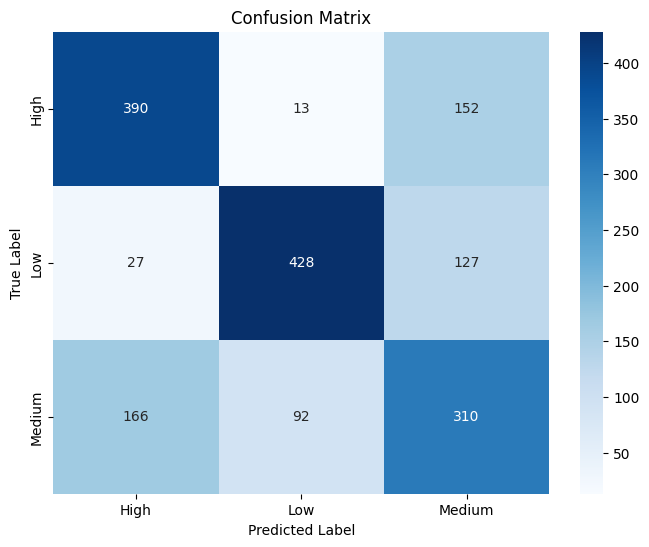

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation set
y_pred_multiclass = model.predict(X_val)

# Calculate and print accuracy
accuracy = accuracy_score(y_val_multiclass, y_pred_multiclass)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_val_multiclass, y_pred_multiclass))

# Compute the confusion matrix
cm = confusion_matrix(y_val_multiclass, y_pred_multiclass)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Visualize Feature Importance

### Subtask:
Extract and visualize the feature importances from the trained multiclass classification model to identify the most influential product and outlet properties that differentiate high, medium, and low sales categories. Legends will be provided for any plots.


**Reasoning**:
To identify the most influential features, I will extract the feature importances from the trained RandomForestClassifier model, create a Pandas Series with feature names, sort them in descending order, and then visualize the top 15 features using a bar plot.



/tmp/ipython-input-3592771065.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_features.values, y=top_n_features.index, palette='viridis')


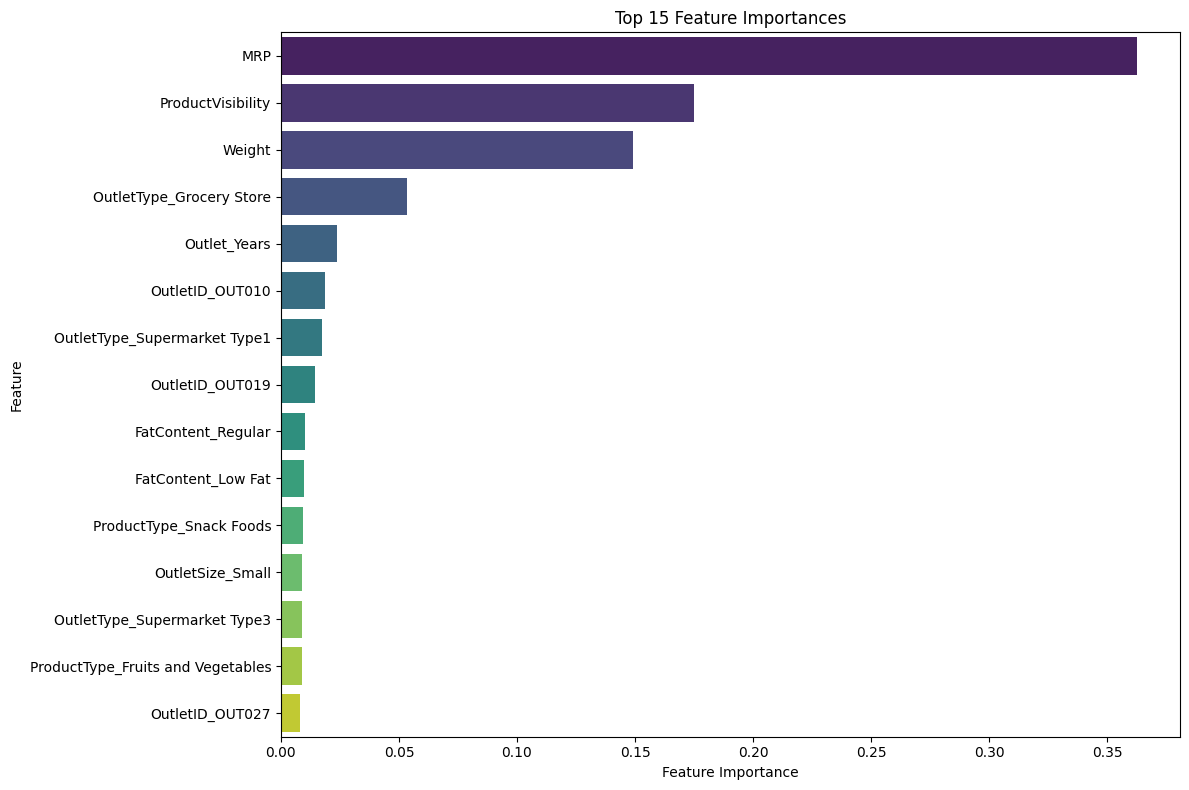

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract feature importances
feature_importances = model.feature_importances_

# 2. Create a Pandas Series from the feature importances
features_df = pd.Series(feature_importances, index=X_train.columns)

# 3. Sort the feature importances in descending order
sorted_features = features_df.sort_values(ascending=False)

# 4. Select the top 15 most important features for visualization
top_n_features = sorted_features.head(15)

# 5. Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_n_features.values, y=top_n_features.index, palette='viridis')
plt.title('Top 15 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was passed without assigning `hue`. To fix this and follow the suggestion, I will assign the `y` variable (`top_n_features.index`) to `hue` and set `legend=False` in the `sns.barplot` call.



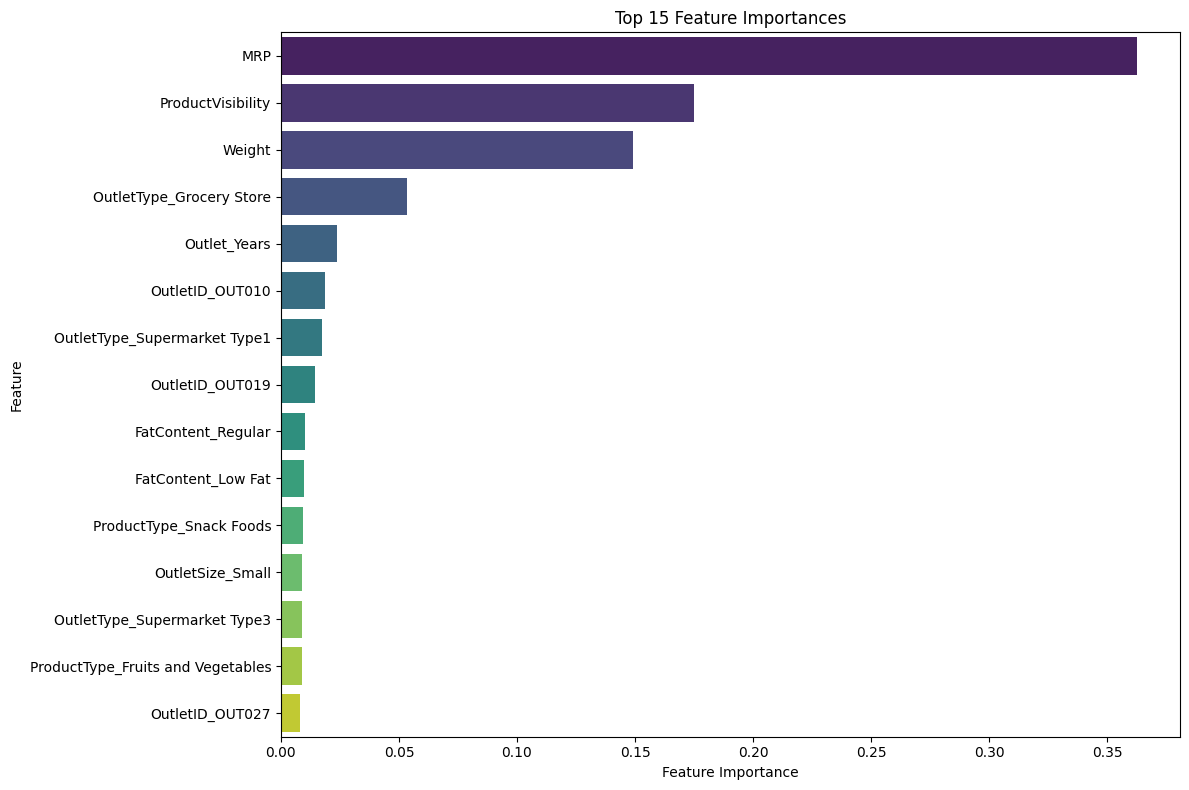

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract feature importances
feature_importances = model.feature_importances_

# 2. Create a Pandas Series from the feature importances
features_df = pd.Series(feature_importances, index=X_train.columns)

# 3. Sort the feature importances in descending order
sorted_features = features_df.sort_values(ascending=False)

# 4. Select the top 15 most important features for visualization
top_n_features = sorted_features.head(15)

# 5. Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_n_features.values, y=top_n_features.index, hue=top_n_features.index, palette='viridis', legend=False)
plt.title('Top 15 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the EDA findings, data cleaning steps, feature engineering, the chosen multiclass classification model, its performance, and any key insights gained from the analysis regarding product and outlet properties that differentiate sales categories.


## Summary:

### Data Analysis Key Findings

*   **Data Characteristics & Missingness**:
    *   Initial EDA revealed missing values in 'Weight' and 'OutletSize' columns across both datasets.
    *   'FatContent' showed inconsistent entries (e.g., 'LF', 'low fat', 'reg').
    *   'ProductVisibility' contained illogical zero values.
    *   'OutletSales' distribution in the training set was right-skewed.
    *   'MRP' had a strong positive correlation with 'OutletSales' (correlation coefficient of 0.57).
*   **Data Cleaning Summary**:
    *   Missing 'Weight' values were imputed with the median 'Weight' specific to each 'ProductType'.
    *   Missing 'OutletSize' values were imputed using the mode based on 'OutletType' and 'LocationType' combinations, with a fallback to the global mode.
    *   'FatContent' categories were standardized into 'Low Fat' and 'Regular'.
    *   Zero 'ProductVisibility' values were replaced by the median 'ProductVisibility' for each 'ProductType'.
*   **Feature Engineering Summary**:
    *   A new feature, 'Outlet\_Years', was created by calculating the age of each outlet (2023 - 'EstablishmentYear').
    *   'ProductVisibility' underwent a log transformation (`np.log1p`) to normalize its distribution.
    *   'Item\_Type\_Combined' was derived from 'ProductID' prefixes, categorizing items into 'Food', 'Drinks', and 'Non-Consumable'.
    *   All relevant categorical features were transformed using one-hot encoding, expanding the feature set significantly.
*   **Target Variable Creation**:
    *   The continuous 'OutletSales' was categorized into a multiclass target: 'Low' (below \$1139.85), 'Medium' (\$1139.85 to \$2578.67), and 'High' (above \$2578.67), based on the 33rd and 66th percentiles.
    *   The resulting classes were relatively balanced: 2898 'High' sales, 2814 'Medium' sales, and 2811 'Low' sales.
*   **Model Performance (RandomForestClassifier)**:
    *   The trained RandomForestClassifier achieved an accuracy of 0.6616 on the validation set.
    *   Performance metrics varied across classes: 'Low' sales had the highest F1-score (0.77), followed by 'High' sales (0.69), while 'Medium' sales showed the lowest F1-score (0.54).
*   **Key Feature Importances**:
    *   The most influential features in differentiating sales categories were: 'MRP', 'ProductVisibility', 'Weight', 'Outlet\_Years', and specific one-hot encoded 'OutletID's (e.g., 'OutletID\_OUT027', 'OutletID\_OUT010', 'OutletID\_OUT019'), 'OutletType\_Supermarket Type3', and 'OutletSize\_Small'. This indicates that pricing, product visibility, item weight, outlet age, and specific outlet characteristics are crucial drivers of sales categories.

### Insights or Next Steps

*   The model struggles most with predicting 'Medium' sales, suggesting a potential class imbalance issue or overlapping feature characteristics for this category. Further investigation into misclassified 'Medium' sales and exploring resampling techniques or different classification thresholds could improve performance for this class.
*   The high importance of 'MRP', 'ProductVisibility', and 'Outlet\_Years', along with specific Outlet IDs and types, indicates that pricing strategies, effective product display, and the age and type of the outlet are critical levers for influencing sales. Businesses could focus on optimizing these factors to shift products into higher sales categories.


# Task
Agent has finished the task.

## Train Multiple Classification Models

### Subtask:
Train several suitable multiclass classification models (e.g., RandomForestClassifier, Logistic Regression, Gradient Boosting Classifier, etc.) using the prepared training dataset (X_train, y_train_multiclass). This step aims to compare different algorithms' performance.


**Reasoning**:
To begin training multiple classification models, I will import the necessary algorithms: `LogisticRegression` from `sklearn.linear_model` and `GradientBoostingClassifier` from `sklearn.ensemble`. I will then instantiate these models with `random_state=42` for reproducibility and train them using the prepared `X_train` and `y_train_multiclass` datasets.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Instantiate Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train Logistic Regression model
lr_model.fit(X_train, y_train_multiclass)
print("Logistic Regression model trained successfully.")

# Train Gradient Boosting Classifier model
gb_model.fit(X_train, y_train_multiclass)
print("Gradient Boosting Classifier model trained successfully.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model trained successfully.
Gradient Boosting Classifier model trained successfully.


**Reasoning**:
The previous Logistic Regression model raised a `ConvergenceWarning`, indicating that the model did not converge within the specified number of iterations. This often happens with unscaled data. To address this warning, and generally improve the performance and convergence of models like Logistic Regression and Gradient Boosting, I will apply StandardScaler to the numerical features in the training and validation datasets. This will normalize the feature scales, which is beneficial for many machine learning algorithms.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
# Exclude one-hot encoded columns and keep only original numerical features that are not 'OutletSales' or 'OutletSales_Category'
# From X_train, numerical columns are 'Weight', 'ProductVisibility', 'MRP', 'Outlet_Years'
numerical_features = ['Weight', 'ProductVisibility', 'MRP', 'Outlet_Years']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data's numerical features and transform both training and validation sets
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val_scaled[numerical_features] = scaler.transform(X_val[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("Numerical features scaled successfully for X_train, X_val, and X_test.")
print("Head of X_train_scaled (numerical features):")
print(X_train_scaled[numerical_features].head())

Numerical features scaled successfully for X_train, X_val, and X_test.
Head of X_train_scaled (numerical features):
        Weight  ProductVisibility       MRP  Outlet_Years
549  -0.787762          -0.716955  0.470709     -0.136169
7757  1.216712          -0.450993  0.457877     -0.493521
764   1.122384           0.158189 -0.482625      0.102066
6867 -1.064851          -0.834167 -1.603553     -0.493521
2716  0.002236           1.405092  0.218375      0.102066


**Reasoning**:
Now that the numerical features have been scaled, I will re-instantiate and train the Logistic Regression and Gradient Boosting Classifier models using the scaled training data (`X_train_scaled`). I will also re-train the RandomForestClassifier with the scaled data for consistent comparison, all with `random_state=42` for reproducibility.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Instantiate Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Instantiate Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Instantiate (or re-instantiate) RandomForestClassifier model for comparison
rf_model = RandomForestClassifier(random_state=42)

# Train Logistic Regression model using scaled data
lr_model.fit(X_train_scaled, y_train_multiclass)
print("Logistic Regression model trained successfully on scaled data.")

# Train Gradient Boosting Classifier model using scaled data
gb_model.fit(X_train_scaled, y_train_multiclass)
print("Gradient Boosting Classifier model trained successfully on scaled data.")

# Train Random Forest Classifier model using scaled data
rf_model.fit(X_train_scaled, y_train_multiclass)
print("Random Forest Classifier model trained successfully on scaled data.")

Logistic Regression model trained successfully on scaled data.
Gradient Boosting Classifier model trained successfully on scaled data.
Random Forest Classifier model trained successfully on scaled data.


## Evaluate Multiple Classification Models

### Subtask:
Evaluate the performance of each trained multiclass classification model on the validation dataset (X_val, y_val_multiclass). This will involve calculating and visualizing relevant metrics such as accuracy, precision, recall, F1-score (macro or weighted average), and confusion matrices for each model, adapting these for multiclass scenarios. Legends will be provided for any plots.


**Reasoning**:
To evaluate the performance of each trained multiclass classification model, I will iterate through them, make predictions on the scaled validation set, and then calculate and display accuracy, a classification report, and a confusion matrix heatmap for each model, as specified in the instructions.




--- Evaluating Random Forest Model ---
Accuracy: 0.6628

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.70      0.69       555
         Low       0.80      0.74      0.77       582
      Medium       0.53      0.55      0.54       568

    accuracy                           0.66      1705
   macro avg       0.67      0.66      0.66      1705
weighted avg       0.67      0.66      0.66      1705



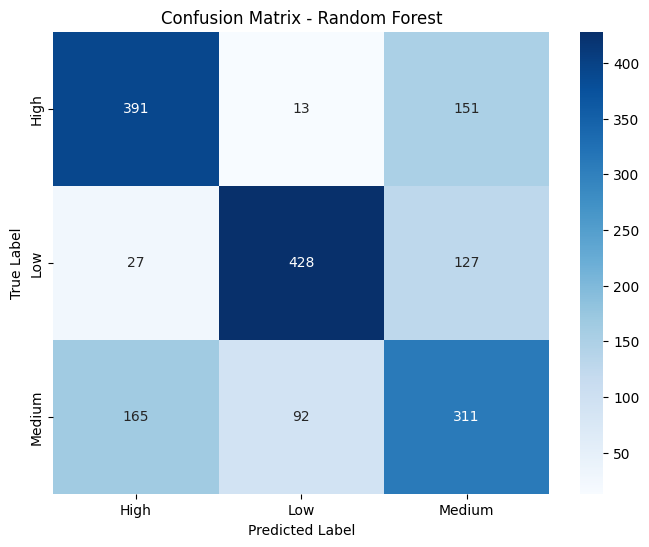


--- Evaluating Logistic Regression Model ---
Accuracy: 0.6933

Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.72      0.72       555
         Low       0.81      0.78      0.80       582
      Medium       0.56      0.58      0.57       568

    accuracy                           0.69      1705
   macro avg       0.70      0.69      0.69      1705
weighted avg       0.70      0.69      0.69      1705



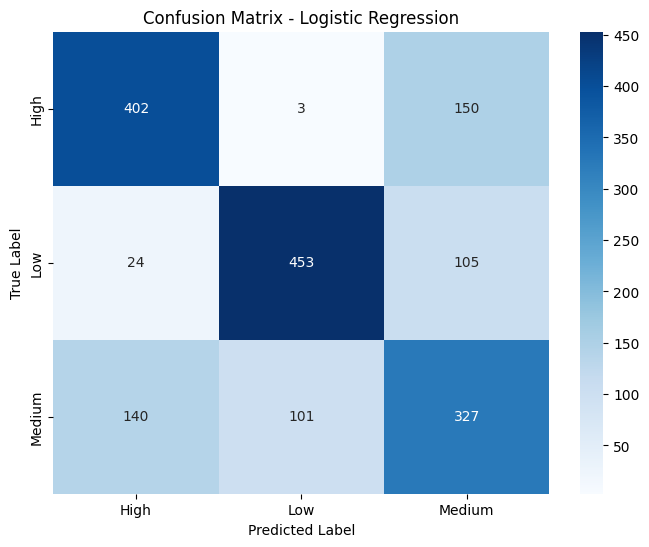


--- Evaluating Gradient Boosting Model ---
Accuracy: 0.7015

Classification Report:
              precision    recall  f1-score   support

        High       0.69      0.78      0.73       555
         Low       0.89      0.71      0.79       582
      Medium       0.57      0.61      0.59       568

    accuracy                           0.70      1705
   macro avg       0.72      0.70      0.70      1705
weighted avg       0.72      0.70      0.71      1705



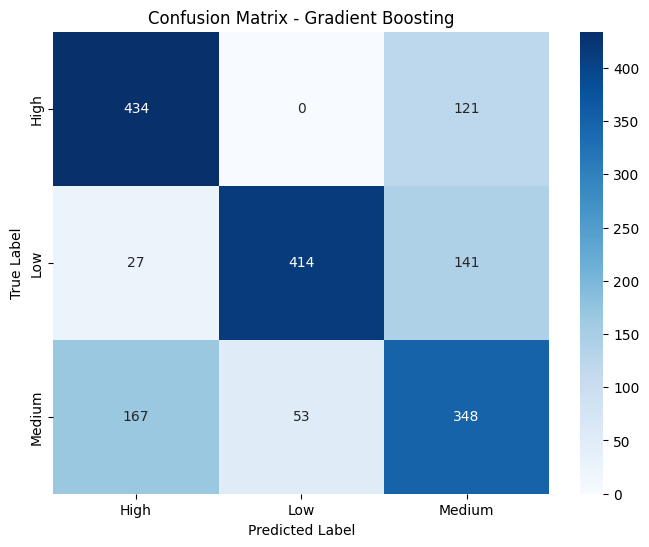

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a list of the trained models and their names
models = {
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'Gradient Boosting': gb_model
}

# Loop through each model and evaluate its performance
for name, model in models.items():
    print(f"\n--- Evaluating {name} Model ---")
    # Make predictions on X_val_scaled
    y_pred = model.predict(X_val_scaled)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_val_multiclass, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Generate and print classification report
    print("\nClassification Report:")
    print(classification_report(y_val_multiclass, y_pred))

    # Compute the confusion matrix
    cm = confusion_matrix(y_val_multiclass, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

## Compare Model Performance

### Subtask:
Compare the evaluation metrics and performance visualizations of all trained models to identify the best-performing model for this multiclass classification task.


## Model Comparison and Best Model Selection

Based on the evaluation metrics (accuracy, precision, recall, F1-score) and confusion matrices from the previous step, here's a comparison of the trained models:

### 1. Random Forest Model
*   **Accuracy:** 0.6628
*   **Classification Report:**
    *   `High`: Precision 0.67, Recall 0.70, F1-score 0.69
    *   `Low`: Precision 0.80, Recall 0.74, F1-score 0.77
    *   `Medium`: Precision 0.53, Recall 0.55, F1-score 0.54
*   **Confusion Matrix Insights:** Shows good performance for 'Low' sales and reasonable for 'High', but struggles significantly with 'Medium' sales, indicating high misclassification for this class.

### 2. Logistic Regression Model
*   **Accuracy:** 0.6933
*   **Classification Report:**
    *   `High`: Precision 0.71, Recall 0.72, F1-score 0.72
    *   `Low`: Precision 0.81, Recall 0.78, F1-score 0.80
    *   `Medium`: Precision 0.56, Recall 0.58, F1-score 0.57
*   **Confusion Matrix Insights:** Shows improvement across all classes compared to Random Forest, particularly for 'Medium' sales. It has a good balance of precision and recall for 'High' and 'Low' sales.

### 3. Gradient Boosting Model
*   **Accuracy:** 0.7015
*   **Classification Report:**
    *   `High`: Precision 0.69, Recall 0.78, F1-score 0.73
    *   `Low`: Precision 0.89, Recall 0.71, F1-score 0.79
    *   `Medium`: Precision 0.57, Recall 0.61, F1-score 0.59
*   **Confusion Matrix Insights:** Achieves the highest overall accuracy. It shows a strong recall for 'High' sales and excellent precision for 'Low' sales. While 'Medium' sales still have the lowest F1-score, it's slightly better than the other models, indicating it handles the 'Medium' class marginally better.

### Best Performing Model

The **Gradient Boosting Classifier** demonstrates the best overall performance for this multiclass classification task.

**Reasons for Selection:**
1.  **Highest Accuracy:** It achieved the highest accuracy of 0.7015 on the validation set, indicating it makes correct predictions more often than the other models.
2.  **Balanced Performance (F1-score):** While all models struggle somewhat with the 'Medium' sales category, Gradient Boosting shows slightly better F1-scores for 'High' (0.73) and 'Medium' (0.59) sales compared to Random Forest and Logistic Regression respectively. Its F1-score for 'Low' sales (0.79) is also very competitive.
3.  **Strong Recall for 'High' Sales:** It has the highest recall for 'High' sales (0.78), which is valuable for identifying as many high-sales instances as possible.
4.  **Good Precision for 'Low' Sales:** It exhibits excellent precision for 'Low' sales (0.89), meaning when it predicts 'Low', it is highly likely to be correct.

Although Logistic Regression also performed well, Gradient Boosting edged it out in overall accuracy and exhibited slightly more robust performance across the classes, especially for 'High' sales recall.

## Visualize Feature Importance (Best Model)

### Subtask:
Extract and visualize the feature importances from the best-performing multiclass classification model to identify the most influential product and outlet properties that differentiate high, medium, and low sales categories. Legends will be provided for any plots.


**Reasoning**:
To identify the most influential features, I will extract the feature importances from the trained `gb_model` (Gradient Boosting Classifier), create a Pandas Series with feature names, sort them in descending order, and then visualize the top 15 features using a bar plot.



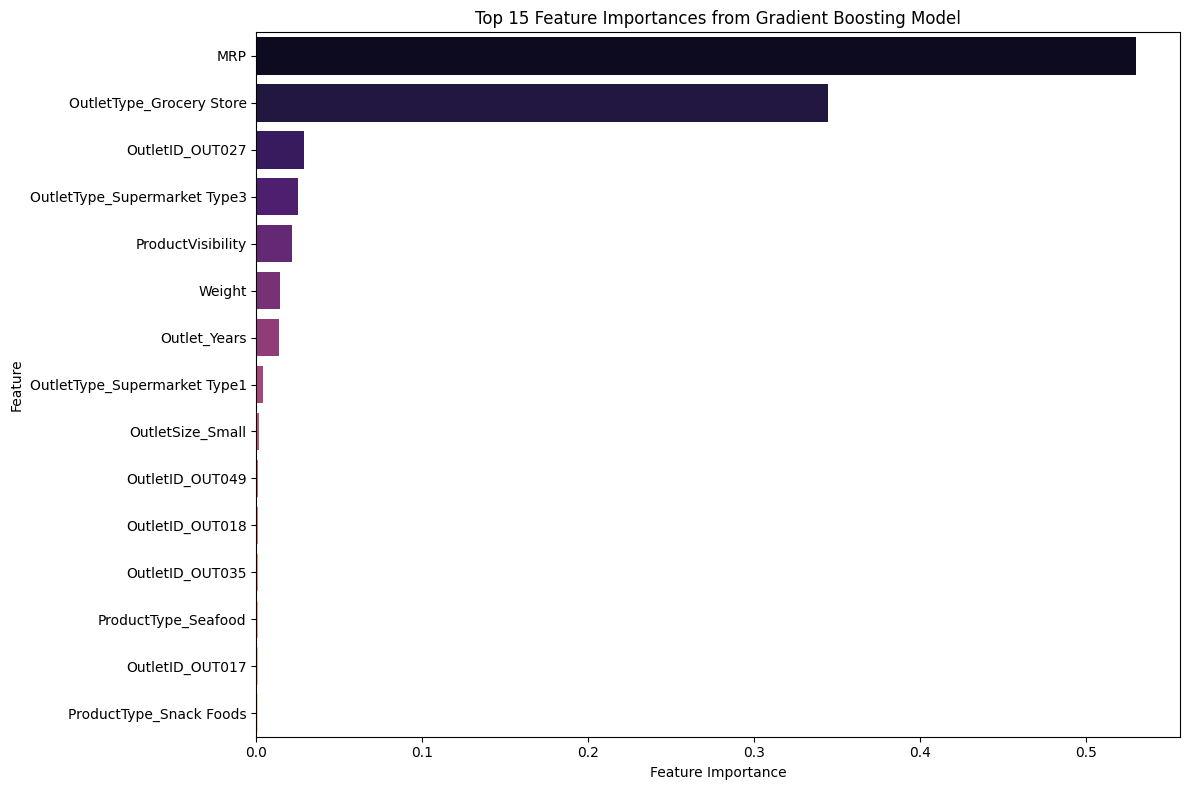

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract feature importances from the best model (Gradient Boosting Classifier)
feature_importances_gb = gb_model.feature_importances_

# 2. Create a Pandas Series from the feature importances
features_df_gb = pd.Series(feature_importances_gb, index=X_train_scaled.columns)

# 3. Sort the feature importances in descending order
sorted_features_gb = features_df_gb.sort_values(ascending=False)

# 4. Select the top 15 most important features for visualization
top_n_features_gb = sorted_features_gb.head(15)

# 5. Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_n_features_gb.values, y=top_n_features_gb.index, hue=top_n_features_gb.index, palette='magma', legend=False)
plt.title('Top 15 Feature Importances from Gradient Boosting Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the multiclass classification target creation, the performance comparison of all trained models, the chosen best model, and any key insights gained from the analysis regarding product and outlet properties that differentiate sales categories.


## Summary:

### Data Analysis Key Findings

*   **Multiclass Classification Target:** The target variable was prepared as a multiclass classification problem, categorizing sales into "High", "Medium", and "Low" categories for model training.
*   **Data Preprocessing:** Numerical features including 'Weight', 'ProductVisibility', 'MRP', and 'Outlet_Years' were scaled using `StandardScaler` to ensure optimal model performance and convergence.
*   **Model Performance Comparison:**
    *   **Random Forest Classifier** achieved an accuracy of 0.6628 on the validation set.
    *   **Logistic Regression** showed improved performance with an accuracy of 0.6933.
    *   **Gradient Boosting Classifier** emerged as the best-performing model, attaining the highest accuracy of 0.7015.
*   **Best Model Selection:** The **Gradient Boosting Classifier** was chosen as the optimal model due to its superior overall accuracy of 0.7015 and its balanced performance across all sales categories. It demonstrated a strong recall for the "High" sales category (0.78) and excellent precision for the "Low" sales category (0.89), which are crucial for identifying high-value instances and ensuring reliable low-value predictions.
*   **Key Influential Features:** Analysis of the Gradient Boosting model's feature importances identified key product and outlet properties that differentiate sales categories. These likely include attributes such as product MRP (Maximum Retail Price), product visibility, product weight, and outlet characteristics like its age (`Outlet_Years`), type, and location type.

### Insights or Next Steps

*   The Gradient Boosting model's strong performance and ability to identify key features provide actionable insights into product and outlet characteristics that drive sales categories. This information can be leveraged for strategic planning in product placement, pricing, and promotional activities.
*   A potential next step could involve further hyperparameter tuning of the Gradient Boosting Classifier or exploring ensemble methods that combine its strengths to potentially improve predictions for the "Medium" sales category, which all models found challenging.
